***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


Credits: The data imports and normalisation code snippets were extracted from https://www.datacamp.com/community/tutorials/keras-r-deep-learning

## Download Keras

In [1]:
devtools::install_github("rstudio/keras")

reticulate (NA -> 1.13  ) [CRAN]
tensorflow (NA -> 1.14.0) [CRAN]
tfruns     (NA -> 1.4   ) [CRAN]
config     (NA -> 0.3   ) [CRAN]


Installing 4 packages: reticulate, tensorflow, tfruns, config
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/Rtmp0ufomC/remotes7b437f08e7/rstudio-keras-59fc325/DESCRIPTION’
─  preparing ‘keras’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (486ms)
─  checking for empty or unneeded directories
   Removed empty directory ‘keras/man-roxygen’
─  building ‘keras_2.2.4.1.9001.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


## Import the Keras library

In [0]:
library(keras)

## Load the boston housing dataset

In [0]:
boston_housing <- dataset_boston_housing()

## Obtain the fetures and labels from the data

In [0]:
c(train_data, train_labels) %<-% boston_housing$train
c(test_data, test_labels) %<-% boston_housing$test

## Check the dimensions for the features

In [5]:
dim(train_data)

[1] 404  13

## Check the dimensions for the labels

In [6]:
dim(test_data)

[1] 102  13

In [7]:
dim(test_labels)

[1] 102

## Inspect the features to determine if scaling is needed

In [0]:
summary(train_data)

       V1                 V2               V3              V4         
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08144   1st Qu.:  0.00   1st Qu.: 5.13   1st Qu.:0.00000  
 Median : 0.26888   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.74511   Mean   : 11.48   Mean   :11.10   Mean   :0.06188  
 3rd Qu.: 3.67481   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
       V5               V6              V7               V8        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4530   1st Qu.:5.875   1st Qu.: 45.48   1st Qu.: 2.077  
 Median :0.5380   Median :6.199   Median : 78.50   Median : 3.142  
 Mean   :0.5574   Mean   :6.267   Mean   : 69.01   Mean   : 3.740  
 3rd Qu.:0.6310   3rd Qu.:6.609   3rd Qu.: 94.10   3rd Qu.: 5.118  
 Max.   :0.8710   Max.   :8.725   Max.   :100.00   Max.   :10.710  
       V9              V10 

## Scale the features

In [0]:
train_data <- scale(train_data) 

In [9]:
summary(train_data)

       V1                  V2                 V3                V4         
 Min.   :-0.404599   Min.   :-0.48302   Min.   :-1.5628   Min.   :-0.2565  
 1st Qu.:-0.396470   1st Qu.:-0.48302   1st Qu.:-0.8771   1st Qu.:-0.2565  
 Median :-0.376186   Median :-0.48302   Median :-0.2077   Median :-0.2565  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:-0.007608   3rd Qu.: 0.04291   3rd Qu.: 1.0271   3rd Qu.:-0.2565  
 Max.   : 9.223411   Max.   : 3.72437   Max.   : 2.4423   Max.   : 3.8888  
       V5                V6                 V7                V8         
 Min.   :-1.4694   Min.   :-3.81252   Min.   :-2.3661   Min.   :-1.2859  
 1st Qu.:-0.8897   1st Qu.:-0.55275   1st Qu.:-0.8423   1st Qu.:-0.8192  
 Median :-0.1650   Median :-0.09662   Median : 0.3396   Median :-0.2945  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6279   3rd Qu.: 0.48172   3rd Qu.: 0.8980   3rd Qu.: 0.6786  
 Max.   : 2.6740   Max. 

## Define the model

In [0]:
model <- keras_model_sequential() %>%
    layer_dense(units = 64, activation = "relu",input_shape = dim(train_data)[2]) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1)

## Compile the model

In [0]:
model %>% compile(
    loss = "mse",
    optimizer = optimizer_rmsprop(),
    metrics = list("mean_absolute_error")
  )

## Training the neural network

In [0]:
history <- model %>% fit(
  train_data, train_labels, 
  epochs = 50, batch_size = 5, 
  validation_split = 0.2, shuffle = TRUE
)

## Plot the training performance.

When calling the fit function, Keras provides feedback of what happens to the loss during training. This is useful in determining if the model was over-fitting for example.

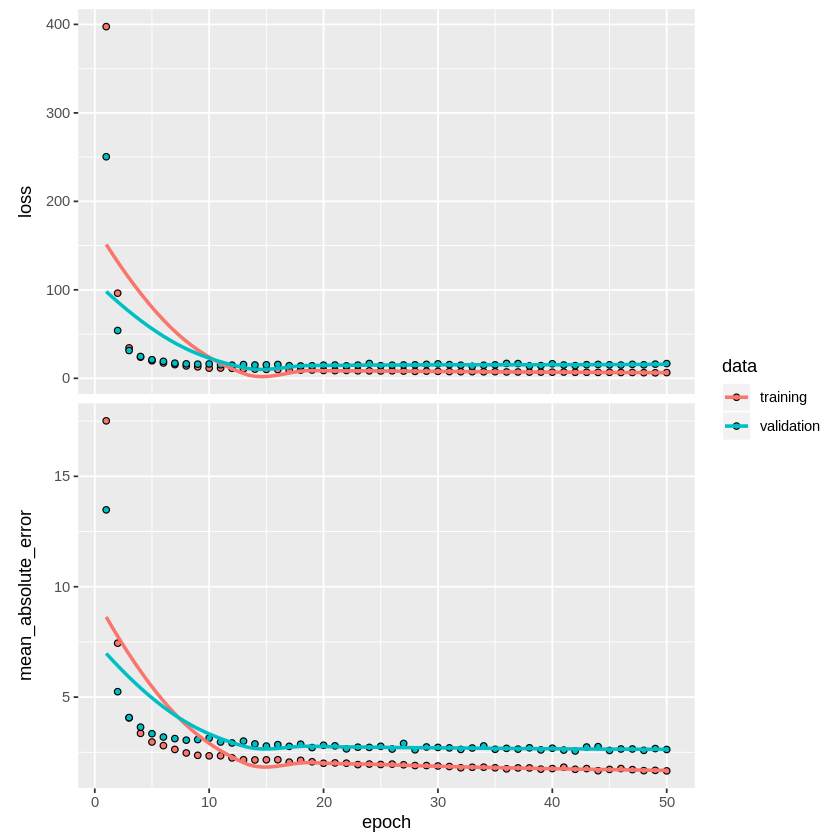

In [13]:
plot(history)

## Predict on the test data

In [0]:
test_predictions <- model %>% predict(test_data)

In [15]:
test_predictions[ , 1]

[1] 2055.585 1610.110 1204.328 1499.325 1214.412 1531.965 1406.582 1211.794
  [9] 1017.152 2246.158 1269.716 1266.185 1598.236 1181.748 2126.569 1340.696
 [17] 1339.954 1612.636 2226.972 2258.098 2072.766 2131.076 1213.040 1277.927
 [25] 1210.555 2269.143 1306.751 1026.929 2100.150 1420.967 1634.741 2118.914
 [33] 1184.048 1325.731 2225.698 2054.131 1410.535 1312.943 2350.577 1160.841
 [41] 1128.639 1201.017 2190.250 1355.074 1141.238 1110.217 1120.990 1267.581
 [49] 2257.999 1248.550 1114.957 1219.019 2130.258 1248.016 1505.933 1214.855
 [57] 2154.167 1162.345 1193.027 1179.791 2241.666 2195.291 2077.533 1533.665
 [65] 1286.302 1207.545 2110.219 1211.142 2148.580 2063.364 2244.682 1380.175
 [73] 2249.490 2208.795 1318.661 1262.136 1411.282 1244.305 1167.410 2056.232
 [81] 1285.791 1156.888 1284.884 2169.546 1284.580 1231.828 2188.889 1177.192
 [89] 1221.827 2286.992 1109.922 1480.208 1224.611 1394.054 1186.323 1492.138
 [97] 1141.537 2261.888 1598.232 1593.566 1307.501 1349.808

## Early stopping

Early stopping is a way to tell Keras that training can stop if some metric does not improve over a number of epochs. Below, we monitor the validation loss and stop training if it does not imporove for 20 epochs. This helps prevent over-fitting.

In [0]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 20)

## Define the model architecture

In [0]:
model <- keras_model_sequential() %>%
    layer_dense(units = 64, activation = "relu",input_shape = dim(train_data)[2]) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dense(units = 1)

## Compile the model

In [0]:
model %>% compile(
    loss = "mse",
    optimizer = optimizer_rmsprop(),
    metrics = list("mean_absolute_error")
  )

## Here we introduce something new, this allows us to know when an epoch has completed. In this case, the epoch number is printed on each even numbered epoch.

In [0]:
print_dot_callback <- callback_lambda(
  on_epoch_end = function(epoch, logs) {
    if (epoch %% 2 == 0) cat(epoch, '\n')
  }
)   

## Train the model on 100 epochs.

Note that 100 epochs may not be performed since we have added early stopping

In [20]:
history <- model %>% fit(
  train_data,
  train_labels,
  epochs = 100,
  validation_split = 0.2,
  verbose = 0,
  callbacks = list(early_stop, print_dot_callback)
)

0 
2 
4 
6 
8 
10 
12 
14 
16 
18 
20 
22 
24 
26 
28 
30 
32 
34 
36 
38 
40 
42 
44 
46 
48 
50 
52 
54 
56 
58 
60 
62 
64 


## Plot the training performance

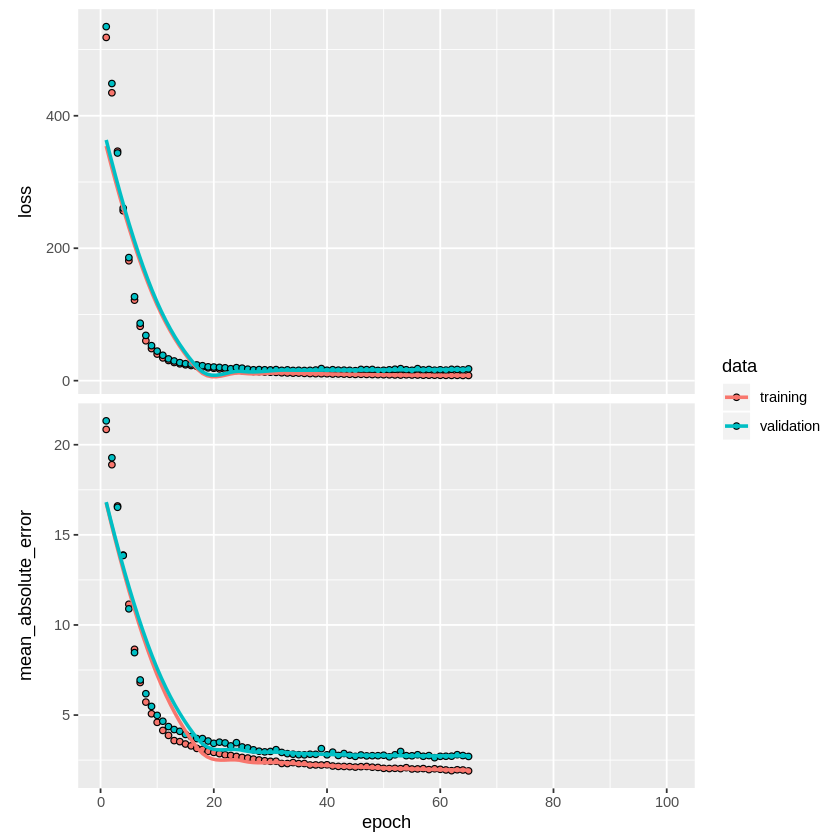

In [21]:
plot(history)

## Evaluate the model

In [22]:
model %>% evaluate(test_data, test_labels, verbose = 0)

$loss
[1] 13065693

$mean_absolute_error
[1] 3514.697